In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import decomposition
from sklearn import preprocessing
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def Processing(path):
    """

    Clean the data by replacing the na_values by the mean 
    of the associated column. Take the path as argument.
    """
    data = pd.read_csv(path, na_values='?')
    for i in data.columns:
        for j in data[i]:
            if(isinstance(j,str)):
                l = [x for x in data[i].unique() if str(x) != 'nan']
                le = LabelEncoder()
                le.fit(l)
                y = le.transform(l)
                for k in range(len(l)):
                    data[i].replace(l[k],y[k], inplace = True)
    data.fillna(round(data.mean(), 2), inplace=True)
    data.to_csv("test.csv", sep=',', index=False)

Processing('data/ckd.csv')

df = pd.read_csv('test.csv',sep=',')

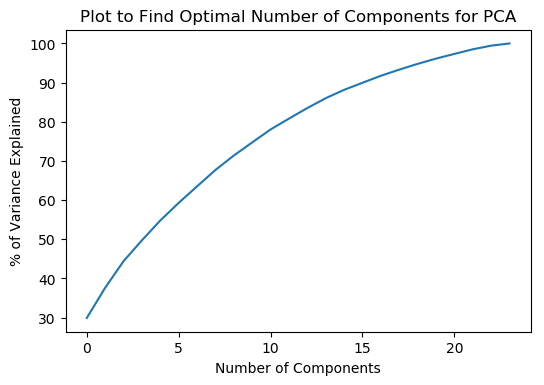

In [2]:
def PCA(Y,Nb):
    std_scale = preprocessing.StandardScaler().fit(Y)
    Y_scaled = std_scale.transform(Y)
    pca = decomposition.PCA(n_components=Nb-1)
    pca.fit(Y_scaled)
    var=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
    plt.figure(dpi=100)
    plt.xlabel('Number of Components')
    plt.ylabel('% of Variance Explained')
    plt.title('Plot to Find Optimal Number of Components for PCA')
    plt.plot(var)
    return pca

N=len(df.columns)
X = df.values[:,0:N-1]
pca=PCA(X,N)

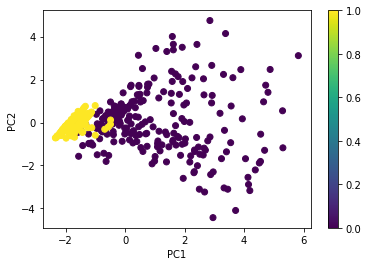

In [19]:
def plot_PCA(Y,Nb):
    std_scale = preprocessing.StandardScaler().fit(Y)
    Y_scaled = std_scale.transform(Y)
    pca = decomposition.PCA(n_components=Nb-1)
    pca.fit(Y_scaled)
    Y_projected = pca.transform(Y_scaled)
    plt.scatter(Y_projected[:, 0], Y_projected[:, 1], c=df.get("Class"))
    plt.colorbar()
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    
plot_PCA(df.values[:,0:N-1],11)

In [11]:
pca_new=decomposition.PCA(n_components=11)
pca_new.fit(X)
x_new=pca_new.transform(X)
classe=df.get(df.columns[-1])
x_new_df=pd.DataFrame(x_new,columns=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11'])
y_new_df=pd.DataFrame(classe,columns=['Class'])
final_data=pd.concat([x_new_df,y_new_df],axis=1)

N=len(x_new_df.columns)
print(N)


In [12]:
final_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,Class
0,-606.237509,-27.862984,-17.172770,-0.288903,4.892120,0.009384,3.624480,-1.194351,0.774925,-1.036385,0.830714,0
1,-2406.168984,0.044570,-41.422789,44.494593,-13.897455,6.188367,-9.232487,0.882157,0.563347,1.912215,2.381645,0
2,-905.115833,274.842947,-45.541734,1.211728,-2.242907,-2.902818,-4.468655,0.464184,-0.569740,0.210606,-0.565112,0
3,-1706.221333,-23.954136,5.581699,1.711397,-2.443513,27.481907,-3.135206,-7.830888,1.474515,0.201703,2.561386,0
4,-1106.287944,-41.768812,-23.444473,-5.391480,6.355837,3.608785,-6.410933,0.406418,0.709411,0.381691,0.855814,0
